# Introduction and Problem Definition

## Overview of Data

**Dataset Informaion**

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.


**Attribute Information:**

* Date (DD/MM/YYYY)
* Time (HH.MM.SS)

* (CO(GT))- True hourly averaged concentration CO in mg/m^3 (reference analyzer)

* (PT08.S1(CO))- PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

* (NMHC(GT))- True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

* (C6H6(GT))- True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* (PT08.S2(NMHC))- PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

* (NOx(GT))- True hourly averaged NOx concentration in ppb (reference analyzer)

* (PT08.S3(NOx))- PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

* (NO2(GT))- True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

* (PT08.S4(NO2))- PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* (PT08.S5(O3))- PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* (T)- Temperature in Â°C
* (RH)- Relative Humidity (%)
* (AH)- AH Absolute Humidity

## Regression or Classification

For Task 1:

Predicting CO Concentration: The objective of this task is to estimate the CO concentration using sensor readings (PT08.S1(CO)), temporal data (day of the week and time), and potentially environmental variables (humidity and temperature). Using the provided features, the goal is to estimate a continuous numerical value (CO concentration in mg/m³).

Regression models are useful for capturing relationships between independent variables (sensor readings, temporal data, environmental factors) and the continuous target variable (CO concentration). This task involves predicting continuous numerical values, so I'll use one for this. For tasks involving predictive modeling, such as estimating or forecasting a numerical result based on inputs, regression models are used.


For Task 2:

Defining Air Quality Index (AQI) and Prediction: The objective of this task is to create the Air Quality Index (AQI) by aggregating the ground-truth measurements of various gases. I will then use machine learning to forecast my own custom-defined AQI based on a variety of sensor readings and additional pertinent columns—not the ground-truth columns. Estimating an AQI, or continuous numerical value, based on sensor data and other variables is another aspect of this task.


I'll utilize a regression model for this task as well because it requires me to predict the AQI, a continuous value. Regression models that quantify the effect of each feature on the target variable, like linear regression, provide interpretability. This interpretability can shed light on the variables that affect the defined AQI.


Regression models like linear regression, decision trees, random forests, or gradient boosting regression models would be appropriate and useful for these purposes given the features of the tasks involving the prediction of continuous values based on sensor readings and other factors.

## Problem Statement

Problem Statement

Task 1: Prediction of CO Concentration

The goal of this task is to create a predictive model that uses data from multiple sensors, temporal information, and possibly environmental factors to estimate the concentration of carbon monoxide (CO) in milligrams per cubic meter (mg/m³). The dataset includes additional information like day of the week, time, temperature, and humidity along with hourly readings from sensors, including PT08.S1(CO) raw sensor readings. For the purpose of training and evaluating the model, the ground truth CO concentration (CO(GT)) from reference analyzers is supplied.

The objective is to develop a regression model that, given the raw sensor data (PT08.S1(CO)), temporal factors (day of the week, time), and possibly environmental variables (temperature, humidity), can accurately predict CO concentration (CO(GT)). Standard regression metrics like Mean Absolute Error (MAE), R-squared, and Root Mean Squared Error (RMSE) will be used to evaluate the model's performance on a test dataset.



Task 2: Creation and Prediction of a Custom Air Quality Index (AQI)

The aim of this task is to create a new Air Quality Index (AQI) by combining ground-truth measurements of various gases that are present in the dataset. The data presented comprises the concentrations of different gases, as determined by certified reference analyzers, including CO, benzene, total nitrogen oxides (NOx), nitrogen dioxide (NO2), and non-methanic hydrocarbons (NMHC). Developing a method or formula to calculate this unique AQI from these gases' concentrations is the task at hand.

Machine learning methods will then be used to forecast this specially defined AQI. The difficulty, though, lies in developing a model that forecasts this index without explicitly referencing the ground-truth columns, which represent the concentrations of distinct gases. This is necessary to avoid data leakage and to replicate real-world situations in which direct measurements might not be possible. We will use other relevant columns and raw sensor readings from multiple sensors to train and test the prediction model.

Using suitable regression evaluation metrics, the prediction model's performance for the specified AQI will be assessed, taking into account both its predictive accuracy and generalization to unobserved data.

# Data Ingestion

In [1]:
# Import Neccessary Libraries

#General modules
import numpy as np
import pandas as pd
from tqdm import *

#For plotting
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import seaborn as sns

#For dealing with time string types
import datetime

#For Exploratory Data Analysis (EDA)
#from ydata_profiling import ProfileReport

#For building ML model
from sklearn.model_selection import train_test_split

#Different Regressors for ML model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#For model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

#For parameter grid search optimization
from sklearn.model_selection import GridSearchCV

#For q-q plot
import scipy.stats as stats

#### Load Dataset

I'll start by loading the data. The data was in .csv format which can be readily loaded into a pandas dataframe using the read_csv function.

In [2]:
# Load the dataset and conver to a dataframe
df = pd.read_csv('AirQuality/AirQuality.csv')

#View the dataset
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,NaN,NaN
5,10/03/2004,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,NaN,NaN
6,11/03/2004,00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,NaN,NaN
7,11/03/2004,01:00:00,1.0,1136,31,3.3,672,62,1453,76,1333,730,10.7,60.0,0.7702,NaN,NaN
8,11/03/2004,02:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,NaN,NaN
9,11/03/2004,03:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517,NaN,NaN


In [3]:
# Shape of the dataframe
print("No of rows in dataset:",df.shape[0])
print("No of columns in dataset:",df.shape[1])

No of rows in dataset: 9357
No of columns in dataset: 17


The data has 9357 observations and 17 different columns. However, there are two columns (labeled as Unnamed 15 and 16) that have garbage on them that I'll have to remove. different attributes.

In [4]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T(C)             float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T(C)           9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.2

# Data Preparation

In [6]:
df.drop(['Unnamed: 15','Unnamed: 16'], axis=1, inplace=True, errors = 'ignore') 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [7]:
# Shape of the dataframe
print("No of rows in dataset:",df.shape[0])
print("No of columns in dataset:",df.shape[1])

No of rows in dataset: 9357
No of columns in dataset: 15


Good. Those columns are gone. Next, I'll check for null values and ensure that all the data is properly formatted. But before tht let's create and hour column

In [8]:
#Split hour from time into new column
df['Hour']=df['Time'].apply(lambda x: int(x.split(':')[0]))
df.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

From the dataset documentation,it is known that faulty or missing sensor readings were filled with the value '-200'. Therefore, I'll handle those instances.

In [9]:
#Replacing bad sensor readings designated by an entry of -200 with NaN
df.replace(to_replace = -200, value = np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7685 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T(C)           8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
 15  Hour           9357 non-null   int64  
dtypes: float64(13), int64(1), object(2)
memory usage: 1.1+ MB


Compared to all the other sensors, NMHC(GT) has a lot of inaccurate readings. Permit me to calculate the percentage of nulls in relation to the total values. This will assist me in deciding whether to maintain or remove that column.

In [10]:
percent_NaN = []
columns = df.columns
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['Null_%_in_Column']).sort_values('Null_%_in_Column',ascending = False)
nan_percent_df

,Null_%_in_Column
NMHC(GT),90.231912
CO(GT),17.868975
NO2(GT),17.548360
NOx(GT),17.516298
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510


I can observe that over 90% of the values in those columns are null. Ninety percent of our data would be lost if I applied the dropna method to the whole dataset. Additionally, we haven't lost all of the hydrocarbon readings because we still have a column that contains data on the concentrations of benzene (C6H6), a hydrocarbon, through the columns C6H6(GT) and PT08.S2(NMHC). Rather than keeping this feature in the dataset, I'll choose to remove it. The CO(GT), NO2(GT), and NOx(GT) values will be filled in by the monthly average of that specific hour, and the remaining values will be filled in with the mean.

In [11]:
df.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')

In [12]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Hour
0,10/03/2004,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
1,10/03/2004,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
2,10/03/2004,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
3,10/03/2004,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
4,10/03/2004,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22


In [13]:
df['Date']=pd.to_datetime(df.Date, format='%d/%m/%Y')   #Format date column
# set the index as date
df.set_index('Date',inplace=True)
df['Month']=df.index.month     #Create month column
df.reset_index(inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Hour,Month
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3


In [14]:
# Now you can fill NaN values with Monthly average of particular Hour

df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
df['NOx(GT)']=df['NOx(GT)'].fillna(df.groupby(['Month','Hour'])['NOx(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['Month','Hour'])['NO2(GT)'].transform('mean'))

In [15]:
percent_NaN = []
columns = df.columns
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['Null_%_in_Column']).sort_values('Null_%_in_Column',ascending = False)
nan_percent_df

,Null_%_in_Column
PT08.S1(CO),3.911510
C6H6(GT),3.911510
PT08.S2(NMHC),3.911510
PT08.S3(NOx),3.911510
PT08.S4(NO2),3.911510
PT08.S5(O3),3.911510
T(C),3.911510
RH,3.911510
AH,3.911510
NOx(GT),2.928289


In [16]:
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T(C)', 'RH', 'AH']

for i in col:
    df[i] = df[i].fillna(df[i].mean())

In [17]:
percent_NaN = []
columns = df.columns
for col in columns:
    pNaN =  (df[col].isna().sum()/df.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['Null_%_in_Column']).sort_values('Null_%_in_Column',ascending = False)
nan_percent_df

,Null_%_in_Column
Date,0.0
Time,0.0
CO(GT),0.0
PT08.S1(CO),0.0
C6H6(GT),0.0
PT08.S2(NMHC),0.0
NOx(GT),0.0
PT08.S3(NOx),0.0
NO2(GT),0.0
PT08.S4(NO2),0.0


In [18]:
# Add Day of week

df["DayOfWeek"] = pd.to_datetime(df["Date"], dayfirst=True).dt.day_name()

df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Hour,Month,DayOfWeek
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3,Wednesday
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3,Wednesday
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3,Wednesday
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3,Wednesday
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3,Wednesday


In [19]:
df['datetime'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
# Define peak datetime ranges on working days and non-working days based on datetime and day of the week
peak_working_day_morning = (df['datetime'].dt.hour >= 8) & (df['datetime'].dt.hour < 12) & (df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))
peak_working_day_evening = (df['datetime'].dt.hour >= 18) & (df['datetime'].dt.hour < 22) & (df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))
peak_non_working_day_morning = (df['datetime'].dt.hour >= 9) & (df['datetime'].dt.hour < 12) & (df['DayOfWeek'].isin(['Saturday', 'Sunday']))

# Define valley datetime range during central hours of the night
valley_datetime = (df['datetime'].dt.hour >= 2) & (df['datetime'].dt.hour < 6)

# Create new fields indicating peak datetime and valley datetime
df['IsPeakdatetime'] = (peak_working_day_morning | peak_working_day_evening | peak_non_working_day_morning)
df['IsValleydatetime'] = valley_datetime


In [20]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Hour,Month,DayOfWeek,datetime,IsPeakdatetime,IsValleydatetime
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3,Wednesday,1900-01-01 18:00:00,True,False
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3,Wednesday,1900-01-01 19:00:00,True,False
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3,Wednesday,1900-01-01 20:00:00,True,False
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3,Wednesday,1900-01-01 21:00:00,True,False
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3,Wednesday,1900-01-01 22:00:00,False,False


## Task 1 (CO prediction)

Now let's select the data for CO prediction, but before then let's see the correlation in this dataset.

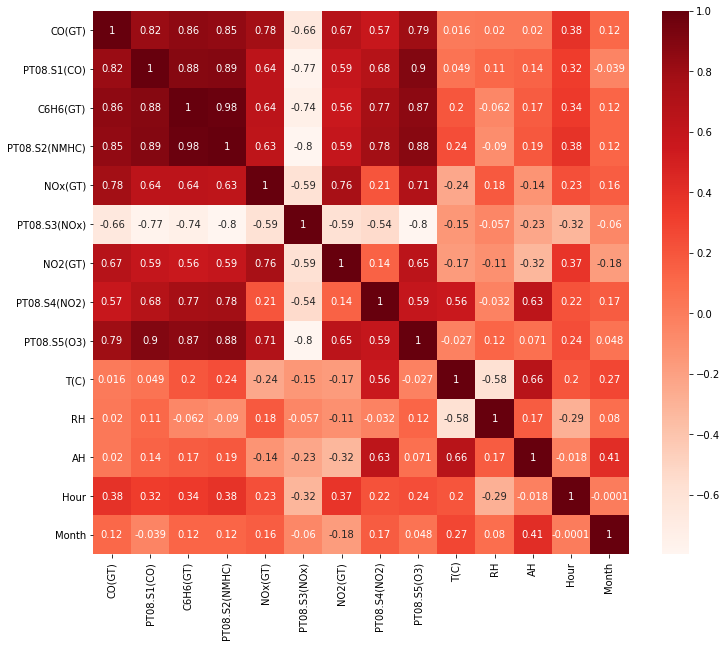

In [21]:
numeric_columns = df.select_dtypes(include='number')  # Select only numeric columns 

# Compute correlations for numeric columns
cor = numeric_columns.corr()

# Display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The objective is to develop a regression model that, given the raw sensor data (PT08.S1(CO)), temporal factors (day of the week, time), and possibly environmental variables (temperature, humidity), can accurately predict CO concentration (CO(GT)). Let's now simplify our dataset to just these variables.

In [22]:
df_tasked1 = df[['DayOfWeek', 'IsPeakdatetime', 'IsValleydatetime', 'PT08.S1(CO)', 'T(C)', 'AH', 'CO(GT)']]

df_tasked1.head()

,DayOfWeek,IsPeakdatetime,IsValleydatetime,PT08.S1(CO),T(C),AH,CO(GT)
0,Wednesday,True,False,1360.0,13.6,0.7578,2.6
1,Wednesday,True,False,1292.0,13.3,0.7255,2.0
2,Wednesday,True,False,1402.0,11.9,0.7502,2.2
3,Wednesday,True,False,1376.0,11.0,0.7867,2.2
4,Wednesday,False,False,1272.0,11.2,0.7888,1.6


If we had attempted to work on Seasons, either by grouping the months together or by attempting to classify the hour into Evening, Morning, Afternoon, and Night, Data Binning would have been required. However, since we don't have any of those columns, it won't be necessary for this task. For our columns, `DayOfweek`, `IsPeakdatetime`, and `IsValleydatetime`, we can proceed with encoding now.

### Encoding of the data

In [23]:
df_tasked1.DayOfWeek.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

Let's start with `DayOfweek`, we have 7 days in a week; so we can represent Monday to Sunday with 0 - 6

In [24]:
# Define a mapping dictionary for day names
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# Create a new column 'DayOfWeek_Num_Name' mapping numerical representation to day names
df_tasked1.loc[:, 'DayOfWeek'] = df_tasked1['DayOfWeek'].map(day_mapping)


df_tasked1.head()

,DayOfWeek,IsPeakdatetime,IsValleydatetime,PT08.S1(CO),T(C),AH,CO(GT)
0,2,True,False,1360.0,13.6,0.7578,2.6
1,2,True,False,1292.0,13.3,0.7255,2.0
2,2,True,False,1402.0,11.9,0.7502,2.2
3,2,True,False,1376.0,11.0,0.7867,2.2
4,2,False,False,1272.0,11.2,0.7888,1.6


That has been done, Next is to change the boolean column(`IsPeakdatetime`,`IsValleydatetime`) to 0 and 1

In [25]:
# Convert IsPeakdatetime to 1 and 0 using astype() method
df_tasked1.loc[:, 'IsPeakdatetime'] = df_tasked1['IsPeakdatetime'].astype(int)
# Convert IsValleydatetime to 1 and 0 using astype() method
df_tasked1.loc[:, 'IsValleydatetime'] = df_tasked1['IsValleydatetime'].astype(int)

df_tasked1.head()

,DayOfWeek,IsPeakdatetime,IsValleydatetime,PT08.S1(CO),T(C),AH,CO(GT)
0,2,1,0,1360.0,13.6,0.7578,2.6
1,2,1,0,1292.0,13.3,0.7255,2.0
2,2,1,0,1402.0,11.9,0.7502,2.2
3,2,1,0,1376.0,11.0,0.7867,2.2
4,2,0,0,1272.0,11.2,0.7888,1.6


Now Let's split our data:

In [26]:
X_1 = df_tasked1.drop('CO(GT)', axis=1)
Y_1 = df_tasked1['CO(GT)']

In [27]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  

In [28]:
# TRAIN/TEST subsets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, Y_1, test_size=0.3, random_state=1994)

# SCALER
rob = RobustScaler()
X_train1 = rob.fit_transform(X_train1)
X_test1 = rob.fit_transform(X_test1)

In [29]:
print('Training data size:',X_train1.shape)
print('Test data size:',X_test1.shape)

Training data size: (6549, 6)
Test data size: (2808, 6)


## Task 2: Creation and Prediction of a Custom Air Quality Index (AQI)

First of all i need to create my Air Quality Index (AQI), and to do that i'll be using this gases: `CO(GT)`,`NOx(GT)`,`NO2(GT)`,`C6H6(GT)`.

In [30]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['CO(GT)','NOx(GT)','NO2(GT)','C6H6(GT)']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
df['AQI'] = df.apply(calculate_overall_aqi, axis=1)

In [31]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,T(C),RH,AH,Hour,Month,DayOfWeek,datetime,IsPeakdatetime,IsValleydatetime,AQI
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,...,13.6,48.9,0.7578,18,3,Wednesday,1900-01-01 18:00:00,True,False,300
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,...,13.3,47.7,0.7255,19,3,Wednesday,1900-01-01 19:00:00,True,False,200
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,...,11.9,54.0,0.7502,20,3,Wednesday,1900-01-01 20:00:00,True,False,200
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,...,11.0,60.0,0.7867,21,3,Wednesday,1900-01-01 21:00:00,True,False,300
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,...,11.2,59.6,0.7888,22,3,Wednesday,1900-01-01 22:00:00,False,False,200


We have now created our AQI, and the next step is for me to choose the columns I will use to forecast it. However, a notification to not use the GT data has already been given. Thus, without them, we will proceed to the next step, the correlation plot.

In [32]:
# Make a copy of the main dataframe
df_task2 = df.copy()

In [33]:
# Drop the GT columns
df_task2.drop(['CO(GT)','NOx(GT)','NO2(GT)','C6H6(GT)'], axis=1, inplace=True, errors = 'ignore')

df_task2.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH,Hour,Month,DayOfWeek,datetime,IsPeakdatetime,IsValleydatetime,AQI
0,2004-03-10,18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,18,3,Wednesday,1900-01-01 18:00:00,True,False,300
1,2004-03-10,19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,19,3,Wednesday,1900-01-01 19:00:00,True,False,200
2,2004-03-10,20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,20,3,Wednesday,1900-01-01 20:00:00,True,False,200
3,2004-03-10,21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,21,3,Wednesday,1900-01-01 21:00:00,True,False,300
4,2004-03-10,22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,22,3,Wednesday,1900-01-01 22:00:00,False,False,200


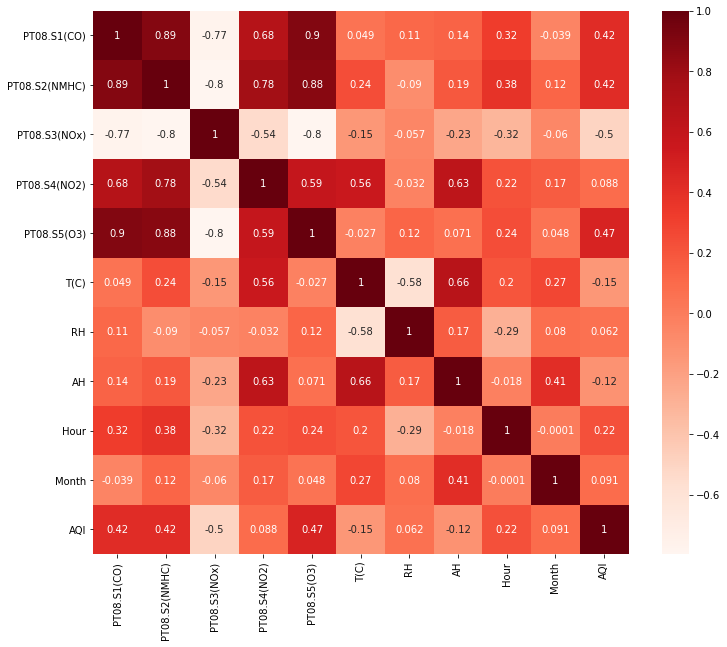

In [34]:
# Now let's plot the corr plot

numeric_columns = df_task2.select_dtypes(include='number')  # Select only numeric columns 

# Compute correlations for numeric columns
cor = numeric_columns.corr()

# Display the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
df_task2 = df_task2[['PT08.S5(O3)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'Hour', 'DayOfWeek', 'IsPeakdatetime', 'IsValleydatetime', 'AQI']]

df_task2.head()

,PT08.S5(O3),PT08.S1(CO),PT08.S2(NMHC),Hour,DayOfWeek,IsPeakdatetime,IsValleydatetime,AQI
0,1268.0,1360.0,1046.0,18,Wednesday,True,False,300
1,972.0,1292.0,955.0,19,Wednesday,True,False,200
2,1074.0,1402.0,939.0,20,Wednesday,True,False,200
3,1203.0,1376.0,948.0,21,Wednesday,True,False,300
4,1110.0,1272.0,836.0,22,Wednesday,False,False,200


**Data Binning**

In the Dataframe we have time in it so we can catrgrize the Hours into `Night`, `Morning`, `Afternoon`, `Evening`. Then we encode

In [36]:
# Define the bins for hour intervals 
bins = [0, 6, 12, 18, 24]  #  0-6, 6-12, 12-18, 18-24

# Define labels for the bins (if needed)
labels = ['Night', 'Morning', 'Afternoon', 'Evening']  # Labels corresponding to the bins

# Bin the 'Hour' column using pd.cut() with defined bins and labels
df_task2['HourBin'] = pd.cut(df_task2['Hour'], bins=bins, labels=labels, include_lowest=True)

df_task2.head()

,PT08.S5(O3),PT08.S1(CO),PT08.S2(NMHC),Hour,DayOfWeek,IsPeakdatetime,IsValleydatetime,AQI,HourBin
0,1268.0,1360.0,1046.0,18,Wednesday,True,False,300,Afternoon
1,972.0,1292.0,955.0,19,Wednesday,True,False,200,Evening
2,1074.0,1402.0,939.0,20,Wednesday,True,False,200,Evening
3,1203.0,1376.0,948.0,21,Wednesday,True,False,300,Evening
4,1110.0,1272.0,836.0,22,Wednesday,False,False,200,Evening


In [37]:
# Drop the hour column
df_task2.drop('Hour', axis=1, inplace=True, errors = 'ignore')

### Encoding of the data

In [38]:
df_task2['HourBin'].unique()

['Afternoon', 'Evening', 'Night', 'Morning']
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

Let's Start with HourBin, We have 4 categories lets change them to number

In [39]:
# Define a mapping dictionary for categorical labels to numerical representations
label_mapping = {'Night': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3}

# Map categorical labels to numerical representations and create a new column 'HourBin_Num'
df_task2.loc[:, 'HourBin'] = df_task2['HourBin'].map(label_mapping)

df_task2.head()

,PT08.S5(O3),PT08.S1(CO),PT08.S2(NMHC),DayOfWeek,IsPeakdatetime,IsValleydatetime,AQI,HourBin
0,1268.0,1360.0,1046.0,Wednesday,True,False,300,2
1,972.0,1292.0,955.0,Wednesday,True,False,200,3
2,1074.0,1402.0,939.0,Wednesday,True,False,200,3
3,1203.0,1376.0,948.0,Wednesday,True,False,300,3
4,1110.0,1272.0,836.0,Wednesday,False,False,200,3


Now for DayOfWeek:

In [40]:
# Define a mapping dictionary for day names
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}

# Create a new column 'DayOfWeek_Num_Name' mapping numerical representation to day names
df_task2.loc[:, 'DayOfWeek'] = df_task2['DayOfWeek'].map(day_mapping)


df_task2.head()

,PT08.S5(O3),PT08.S1(CO),PT08.S2(NMHC),DayOfWeek,IsPeakdatetime,IsValleydatetime,AQI,HourBin
0,1268.0,1360.0,1046.0,2,True,False,300,2
1,972.0,1292.0,955.0,2,True,False,200,3
2,1074.0,1402.0,939.0,2,True,False,200,3
3,1203.0,1376.0,948.0,2,True,False,300,3
4,1110.0,1272.0,836.0,2,False,False,200,3


Now for IsPeakdatetime and IsValleydatetime

In [41]:
# Convert IsPeakdatetime to 1 and 0 using astype() method
df_task2.loc[:, 'IsPeakdatetime'] = df_task2['IsPeakdatetime'].astype(int)
# Convert IsValleydatetime to 1 and 0 using astype() method
df_task2.loc[:, 'IsValleydatetime'] = df_task2['IsValleydatetime'].astype(int)

df_task2.head()

,PT08.S5(O3),PT08.S1(CO),PT08.S2(NMHC),DayOfWeek,IsPeakdatetime,IsValleydatetime,AQI,HourBin
0,1268.0,1360.0,1046.0,2,1,0,300,2
1,972.0,1292.0,955.0,2,1,0,200,3
2,1074.0,1402.0,939.0,2,1,0,200,3
3,1203.0,1376.0,948.0,2,1,0,300,3
4,1110.0,1272.0,836.0,2,0,0,200,3


Now Let's split:

In [42]:
X_2 = df_task2.drop('AQI', axis=1)
Y_2 = df_task2['AQI']

In [43]:
# TRAIN/TEST subsets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, Y_2, test_size=0.3, random_state=1994)

# SCALER
rob = RobustScaler()
X_train2 = rob.fit_transform(X_train2)
X_test2 = rob.fit_transform(X_test2)

In [44]:
# Size
print('Training data size:',X_train2.shape)
print('Test data size:',X_test2.shape)

Training data size: (6549, 7)
Test data size: (2808, 7)


# Model Training

## Task 1 (CO prediction)

In [54]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split      #import train test split
from sklearn.linear_model import LinearRegression         #import linear regression package
from sklearn.metrics import mean_squared_error,mean_absolute_error   #import mean squared error and mean absolute error

We will utilize the linear regression model to predict CO since it is straightforward, easy to understand, and can shed light on the linear relationships that exist between the target variable and the features.

In [59]:
# Let's creat a features list

features = X_1.columns.to_list()
features

['DayOfWeek',
 'IsPeakdatetime',
 'IsValleydatetime',
 'PT08.S1(CO)',
 'T(C)',
 'AH']

In [60]:
lr=LinearRegression()
lr_model=lr.fit(X_train1,y_train1)          #fit the linear model on train data

In [61]:
print('Intercept:',lr_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(features,lr_model.coef_))

Intercept: 1.8994822909829163
--------------------------------
Slope:


[('DayOfWeek', -0.09634423137118679),
 ('IsPeakdatetime', 0.49955591822579704),
 ('IsValleydatetime', -0.2034494338489677),
 ('PT08.S1(CO)', 1.3878249949981518),
 ('T(C)', 0.0517875964318045),
 ('AH', -0.1951994898393913)]

Now Let's Evaluate the basline model

In [62]:
y_pred=lr_model.predict(X_test1)                      #predict using the model
rmse=np.sqrt(mean_squared_error(y_test1,y_pred))      #calculate rmse
print('Baseline RMSE of model:',rmse)

Baseline RMSE of model: 0.7694935663486966


This indicates that with an RMSE of 0.76, we can predict CO(GT) using all of the features combined. We'll refer to it as the baseline model.


I now want to experiment with different feature combinations to see if the RMSE improves.

In [103]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=df_tasked1[feature]
    y=df_tasked1['CO(GT)']
    X_std_one=rob.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.3,random_state=42)
    lr_model_one=lr.fit(X_trainR,y_trainR)
    y_predR=lr_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [90]:
print('RMSE with Features as',features[0:2],train_test_RMSE(features[0:2]))
print('-------------------------')
print('RMSE with Features as',features[0:3],train_test_RMSE(features[0:3]))
print('-------------------------')
print('RMSE with Features as',features[0:4],train_test_RMSE(features[0:4]))
print('-------------------------')
print('RMSE with Features as',features[3:5],train_test_RMSE(features[3:5]))
print('-------------------------')
print('RMSE with Features as',features[0:5],train_test_RMSE(features[0:5]))
print('-------------------------')
print('RMSE with Features as',features[3:6],train_test_RMSE(features[3:6]))
print('-------------------------')
print('RMSE with Features as',features[0:6:2],train_test_RMSE(features[0:6:2]))
print('-------------------------')
print('RMSE with Features as',features[0::3],train_test_RMSE(features[0::3]))
print('-------------------------')
print('RMSE with Features as',features[1:4],train_test_RMSE(features[1:4]))
print('-------------------------')
print('RMSE with Features as',features[1:3],train_test_RMSE(features[1:3]))

RMSE with Features as ['DayOfWeek', 'IsPeakdatetime'] 1.279045542083742
-------------------------
RMSE with Features as ['DayOfWeek', 'IsPeakdatetime', 'IsValleydatetime'] 1.2155953096357694
-------------------------
RMSE with Features as ['DayOfWeek', 'IsPeakdatetime', 'IsValleydatetime', 'PT08.S1(CO)'] 0.7736955212674875
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'T(C)'] 0.8092627399775887
-------------------------
RMSE with Features as ['DayOfWeek', 'IsPeakdatetime', 'IsValleydatetime', 'PT08.S1(CO)', 'T(C)'] 0.7726535099453232
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'T(C)', 'AH'] 0.7977190038565563
-------------------------
RMSE with Features as ['DayOfWeek', 'IsValleydatetime', 'T(C)'] 1.303788704718488
-------------------------
RMSE with Features as ['DayOfWeek', 'PT08.S1(CO)'] 0.8040025212508957
-------------------------
RMSE with Features as ['IsPeakdatetime', 'IsValleydatetime', 'PT08.S1(CO)'] 0.7762661696179237
--------------------

My baseline model has the lowest RMSE, as can be seen, and after this experiment, it appears to be operating at its peak.

## Task 2: Creation and Prediction of a Custom Air Quality Index (AQI)

We will utilize the Random Forest regression model for the AQI prediction since Random Forests can handle multiple features efficiently and provide feature importance, which helps create the AQI. They are less prone to overfitting and more robust.

In [92]:
rf_reg=RandomForestRegressor()

In [93]:
rf_model=rf_reg.fit(X_train2,y_train2)         #fit model   
y_pred_rf=rf_model.predict(X_test2)           #predict

In [95]:
#Calculate RMSE
print('RMSE of predicted AQI in RF model:',np.sqrt(mean_squared_error(y_test2,y_pred_rf)))

RMSE of predicted AQI in RF model: 85.03586119203733


Although the RMSE of 85.03 is excessively high, we will accept it as the baseline model. Let's now apply automated hyperparameter optimization.

In [102]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)
rf_model_two=rf_grid.fit(X_train2,y_train2)     #fit the model wtih all grid parameters
y_pred_rf_two=rf_model_two.predict(X_test2)        #predict
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test2,y_pred_rf_two)))  

RMSE using RF grid search method 83.20252147125547


The improved Random Forest regression algorithm yields a better RMSE value than the baseline model, 83.20 using automatic hyperparameter optimization. Using Random Forest regression, the predicted RMSE was 85.03.

# Model Evaluation

Root Mean Squared Error (RMSE), which calculates the average magnitude of errors between anticipated and actual data, will be used for both tasks.

The average of squared differences between anticipated and actual values is represented by the square root of the RMSE metric. Reduced root mean square error (RMSE) values show that, on average, the model's predictions are closer to the real target values. As a result, improved accuracy and a better model-to-data fit are shown by a reduced RMSE.

The model with the smaller RMSE is usually seen as having less error in its predictions and is therefore better at producing more accurate predictions on the test or validation data when comparing different models or iterations of the same model.

* For Task 1:

    To predict the CO concentration, I used Linear Regression. To predict the CO (baseline model), I used all of the features. To improve the RMSE value, I also attempted mixing and iterating over the features (improved model). It was interesting to learn that the basline model has the lowest RMSE.
    
    0.769 for Linear Regression


* For Task 2:
    In order to predict the AQI, I used Random Forest Regression. First, I used the basic Random Forest algorithm by default. Next, I improved the model by performing automatic hyperparameter testing to find the optimal parameters that fit the algorithm. This resulted in a lower RMSE score.
    
    83.20 for Random Forest Regression

# Conclusion

**Task 1 (CO Concentration Prediction):**

When compared to feature-mixed or iterated models, the baseline model that used linear regression performed the best and had the minimum RMSE.

The baseline Linear Regression model with all features gave the best CO concentration predictions even after experimenting with alternative feature combinations.



**Task 2 (AQI Prediction):**

The baseline Random Forest model initially had a higher RMSE, but after performing hyperparameter tuning, the improved model achieved a lower RMSE.

The improved Random Forest model, after hyperparameter tuning, outperformed the default model, indicating the importance of tuning parameters for better performance.


In summary, for Task 1, the baseline Linear Regression model using all features outperformed the models with modified feature sets. For Task 2, the improved Random Forest model, after hyperparameter tuning, resulted in better performance compared to the default model. It's crucial to note the importance of model selection and parameter tuning in achieving better predictive performance.

## Sources

Slicing- https://www.geeksforgeeks.org/python-list-slicing/

AQI- https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/

Markdown- https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

Calculating AQI, Using WHO standard- https://www.who.int/news-room/questions-and-answers/item/who-global-air-quality-guidelines

Random Forest Regression- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html